# Projeto Mulheres Vítimas Versão 3
## Classificação de municípios quanto ao risco de violência contra mulher


**João L. S. Júnior**\
Universidade Federal do Pará - UFPA \
Laboratório de Pesquisa Operacional - LPO\
Instituto Federal de Educação, Ciência e Tecnologia do Pará - IFPA\
Copyright(c) 2023.


---

Comunicação com API IBGE

In [227]:
from generators.IBGE_DataFetcher import IBGEDataFetcher

state = 'pa'  # Exemplo: Pará
fetcher = IBGEDataFetcher(state)
df_munic = fetcher.fetch_municipalites_info()
df_munic

,id,localidade,IAP,IDH,PIB,GINI
0,150010,Abaetetuba,0.45,0.628,9458.72,0.60
1,150013,Abel Figueiredo,0.47,0.622,11420.76,0.63
2,150020,Acará,0.12,0.506,13582.97,0.64
3,150030,Afuá,0.12,0.489,9405.70,0.61
4,150034,Água Azul do Norte,0.27,0.564,15819.85,0.63
...,...,...,...,...,...,...
139,150815,Uruará,0.15,0.589,13401.03,0.62
140,150820,Vigia,0.32,0.617,7216.02,0.64
141,150830,Viseu,0.47,0.515,7952.36,0.63
142,150835,Vitória do Xingu,0.00,0.596,270414.24,0.62


In [228]:
# if state == 'pa':
#     df_munic.drop(73, inplace=True)

In [229]:
df_munic.loc[73]

id                      150475
localidade    Mojuí dos Campos
IAP                        0.0
IDH                        0.0
PIB                   10580.49
GINI                       0.0
Name: 73, dtype: object

In [230]:
# Suponha que você tenha um DataFrame df
# df = pd.DataFrame(...)

# Definindo as colunas nas quais você está interessado
colunas_interesse = ['IAP', 'IDH', 'GINI']

# Escolhendo a linha que você deseja alterar (por exemplo, a linha com índice 0)
indice_linha = 73

# Criando um subconjunto do DataFrame sem a linha de índice 73
df_subconjunto = df_munic.drop(index=indice_linha)

# Encontrando o menor valor para cada coluna
valores_minimos = df_subconjunto[colunas_interesse].min()


# Atribuindo os valores mínimos à linha selecionada
df_munic.loc[indice_linha, colunas_interesse] = valores_minimos

# Agora, a linha especificada tem os menores valores de cada coluna nas colunas selecionadas

df_munic.loc[73]

id                      150475
localidade    Mojuí dos Campos
IAP                        0.0
IDH                      0.418
PIB                   10580.49
GINI                      0.51
Name: 73, dtype: object

In [231]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

df_munic_normalized = pd.DataFrame()

# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Selecione as colunas a serem normalizadas (exceto 'id' e 'nome')
columns_to_normalize = ['IAP', 'IDH', 'PIB', 'GINI']


# Aplique o MinMaxScaler às colunas selecionadas
df_munic_normalized[columns_to_normalize] = scaler.fit_transform(df_munic[columns_to_normalize])

# Resultado normalizado
print(df_munic_normalized.loc[73])

IAP     0.00000
IDH     0.00000
PIB     0.01832
GINI    0.00000
Name: 73, dtype: float64


In [232]:
df_munic_normalized = df_rounded = df_munic_normalized.round(2)

df_munic_normalized

,IAP,IDH,PIB,GINI
0,0.67,0.64,0.01,0.56
1,0.70,0.62,0.02,0.75
2,0.18,0.27,0.03,0.81
3,0.18,0.22,0.01,0.63
4,0.40,0.45,0.04,0.75
...,...,...,...,...
139,0.22,0.52,0.03,0.69
140,0.48,0.61,0.01,0.81
141,0.70,0.30,0.01,0.75
142,0.00,0.54,0.94,0.69


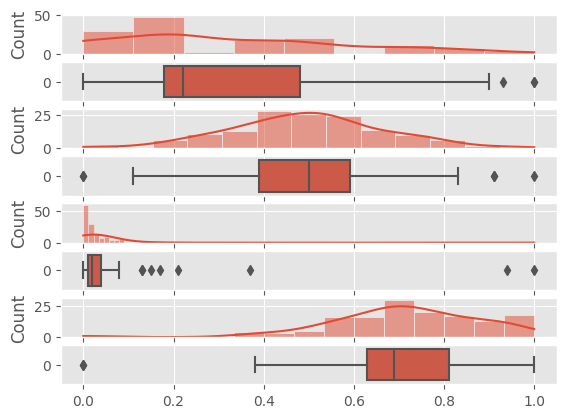

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df_munic_normalized


p1 = df['IAP']
p2 = df['IDH']
p3 = df['PIB']
p4 = df['GINI']

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8)
sns.histplot(p1, kde=True, ax=ax1)
sns.boxplot(p1, orient="h", ax=ax2)
sns.histplot(p2, kde=True, ax=ax3)
sns.boxplot(p2, orient="h", ax=ax4)
sns.histplot(p3, kde=True, ax=ax5)
sns.boxplot(p3, orient="h", ax=ax6)
sns.histplot(p4, kde=True, ax=ax7)
sns.boxplot(p4, orient="h", ax=ax8)
#plt.xlim(-1, 1)
plt.show()

In [234]:
def print_limits(dataset: pd.DataFrame) -> np.array:

    r = []
    r.append(df.quantile(0.25))
    r.append(df.quantile(0.75))
    r.append(df.quantile(0.90))

    return np.array(r)

In [235]:
#B = print_limits(scaled_df.iloc[:,2:6]).tolist()
B = print_limits(df).tolist()

In [236]:
B

[[0.18, 0.39, 0.01, 0.63], [0.48, 0.5925, 0.04, 0.81], [0.7, 0.73, 0.07, 0.94]]

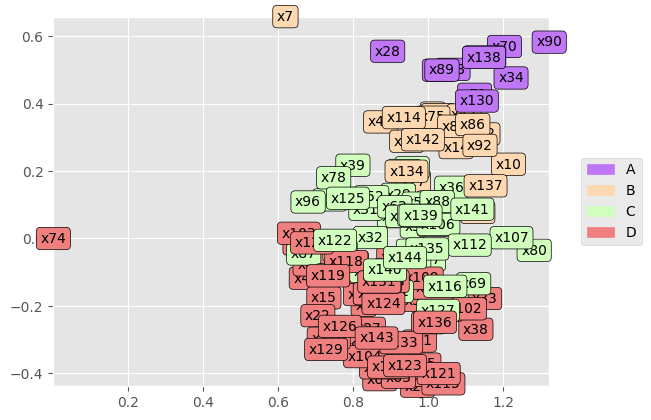

In [237]:

Q = [0.0]*4
#P = [0.55]*4
#P = [0.18, 0.18, 0.08, 0.15]
P = [0.0]*4
V = [0.0]*4
W = [0.6,     0.0,      0.0,     0.0]


from pyDecision.algorithm import electre_tri_b

classification = electre_tri_b(np.array(df), W , Q , P , V , B, cut_level = 0.65, verbose = False, rule = 'pc', graph = True)

In [ ]:
df_munic.iloc[:,:2]

In [242]:
df_munic_classified = df_munic.iloc[:,:2]
df_munic_classified[columns_to_normalize] = df_munic_normalized
df_munic_classified['CLASS'] = classification
df_munic_classified.to_parquet("datasets/df_classified_pa.parquet")
df_munic_classified

,id,localidade,IAP,IDH,PIB,GINI,CLASS
0,150010,Abaetetuba,0.67,0.64,0.01,0.56,1
1,150013,Abel Figueiredo,0.70,0.62,0.02,0.75,1
2,150020,Acará,0.18,0.27,0.03,0.81,3
3,150030,Afuá,0.18,0.22,0.01,0.63,3
4,150034,Água Azul do Norte,0.40,0.45,0.04,0.75,2
...,...,...,...,...,...,...,...
139,150815,Uruará,0.22,0.52,0.03,0.69,2
140,150820,Vigia,0.48,0.61,0.01,0.81,2
141,150830,Viseu,0.70,0.30,0.01,0.75,1
142,150835,Vitória do Xingu,0.00,0.54,0.94,0.69,3


In [222]:
# Calcula a contagem de cada classificação
class_counts = df_munic_classified['CLASS'].value_counts().reset_index()
class_counts.columns = ['CLASS', 'count']

class_counts

,CLASS,count
0,3,61
1,2,52
2,1,19
3,0,12


In [243]:
# Required Libraries
import numpy as np


from dashboard.classifier.electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.model_selection import train_test_split

dataset = df

countries = df_munic['localidade']
X         = dataset.values

# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 4
target    = classification
# target    = []

cut_level = [0.5, 1.0]
Q         = [] #[0.15, 0.12, 0.11, 0.12]
P         = [] #[0.22, 0.14, 0.17, 0.24]
V         = [] #[0.44, 0.27, 0.22, 0.35]
W         = [0.6,     0.0,      0.0,     0.0]
B         = []
models    = 10 # 200

# Acc = 8.6
# Parameters - GA
elite       = 2 #     1 
eta         = 1 #     1
mu          = 1 #     1
size        = 15 #    15
rate        = 0.2 #  0.05
generations = 30 #    30
samples     = 0.10 #  10




In [244]:

models = tree_e_tri_b.tree_electre_tri_b(
    X, 
    target_assignment = target, 
    W = W, 
    Q = Q, 
    P = P, 
    V = V, 
    B = B, 
    cut_level = cut_level, 
    rule = rule, 
    number_of_classes = classes, 
    elite = elite, 
    eta = eta, mu = mu, 
    population_size = size, 
    mutation_rate = rate, 
    generations = generations, 
    samples = samples, 
    number_of_models = models)   



Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


Salva o modelo treinado

In [204]:
type(models)

list

In [205]:
import pickle


# Salvando a lista em um arquivo

with open('datasets/models_treinado_acc_84.pkl', 'wb') as f:
    pickle.dump(models, f)



In [206]:
# Recuperando a lista do arquivo
with open('datasets/models_treinado_acc_84.pkl', 'rb') as f:
    lista_recuperada = pickle.load(f)

print(lista_recuperada)


[[array([0.6, 0. , 0. ]), 1.0, [0, 1, 2], [3], [84, 68, 25, 106, 123, 32, 51, 36, 133, 74, 78, 22, 100, 112, 127, 114, 75, 30, 60, 20, 69, 49, 39, 40, 138, 72, 139, 83, 82, 134, 136, 131, 7, 53, 55, 97, 48, 26, 38, 42, 8, 85, 18, 58, 99, 50, 105, 117, 3, 109, 121, 95, 118, 71, 52, 59, 54, 41, 92, 11, 17, 132, 31, 27, 13, 91, 5, 142, 120, 33, 2, 14, 63, 43, 129, 111, 137, 103, 56, 102, 67, 104, 128, 19, 34, 122, 141, 24, 16, 143, 12, 101, 125, 76, 23, 6, 62, 86, 45, 124, 130, 77, 44, 61, 115, 93, 79, 94, 28, 116, 29, 110, 65, 35, 126, 96, 135, 113, 87, 119, 140, 4, 73, 9, 89, 0, 98, 80, 64, 90], [[0.20806043608719219, 0.0, 0.08], [0.5774549797533515, 0.14173698292019862, 0.08], [0.7104158398304815, 0.5582588402258277, 0.08]], 0.6672861825588127, [1, 2, 2, 3, 3, 2, 2, 0, 3, 0, 1, 0, 3, 3], [1, 2, 2, 3, 3, 2, 2, 0, 3, 0, 1, 0, 3, 3], array([0.        , 0.19628311, 0.        ]), array([0.        , 0.25273517, 0.        ]), array([1.        , 0.57392099, 0.08      ])], [array([0.6, 0. ]), 1

In [209]:
X

array([[0.67, 0.64, 0.01, 0.56],
       [0.7 , 0.62, 0.02, 0.75],
       [0.18, 0.27, 0.03, 0.81],
       [0.18, 0.22, 0.01, 0.63],
       [0.4 , 0.45, 0.04, 0.75],
       [0.18, 0.45, 0.02, 0.63],
       [0.7 , 0.68, 0.04, 0.  ],
       [0.18, 0.75, 0.07, 0.56],
       [0.48, 0.2 , 0.01, 0.81],
       [0.55, 0.91, 0.04, 0.69],
       [0.4 , 0.4 , 0.03, 0.56],
       [0.4 , 0.31, 0.01, 0.56],
       [0.78, 0.31, 0.01, 0.81],
       [0.7 , 0.38, 0.01, 0.81],
       [0.18, 0.16, 0.  , 0.75],
       [0.48, 0.49, 0.02, 0.75],
       [0.  , 0.54, 0.07, 0.69],
       [0.78, 0.74, 0.13, 0.5 ],
       [0.55, 1.  , 0.06, 0.38],
       [0.  , 0.52, 0.01, 0.94],
       [0.  , 0.75, 0.07, 0.75],
       [0.  , 0.52, 0.02, 0.56],
       [0.  , 0.39, 0.02, 1.  ],
       [0.22, 0.55, 0.01, 0.69],
       [0.  , 0.59, 0.05, 0.88],
       [0.  , 0.53, 0.02, 0.69],
       [0.52, 0.46, 0.01, 0.69],
       [0.9 , 0.26, 0.01, 0.56],
       [0.48, 0.41, 0.03, 0.69],
       [0.3 , 0.17, 0.  , 0.88],
       [0.

In [199]:
# Predict
prediction, solutions = tree_e_tri_b.predict(models, X, verbose = False, rule = rule)

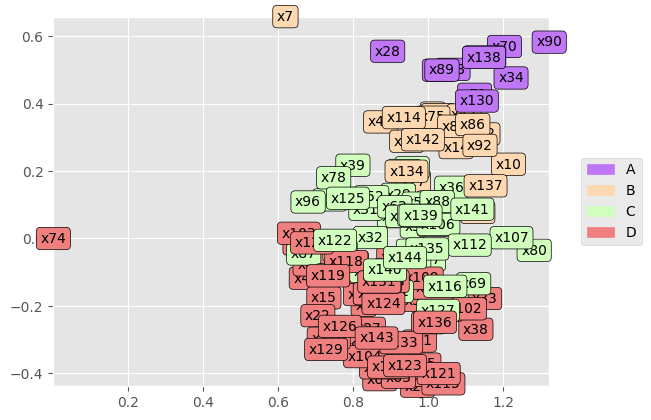

In [208]:
# Plot - Tree Model
util_e_tri_b.plot_points(X, prediction)

In [201]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes) 

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
  print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
print('Lambda Cutoff: ', round(cut_mean,  2))
print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.6 0.  0.  0. ]
Q:  [0.09 0.06 0.01 0.19]
P:  [0.19 0.14 0.01 0.22]
V:  [0.58 0.23 0.1  0.35]
b1:  [0.13 0.37 0.11 0.69]
b2:  [0.43 0.43 0.18 0.74]
b3:  [0.63 0.54 0.19 0.8 ]
Lambda Cutoff:  0.76
Accuracy:  0.84


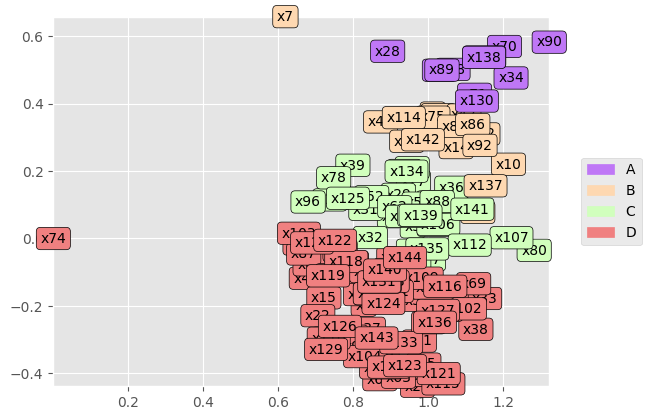

In [207]:
# Plot - Elicitated Parameters
with open('datasets/models_treinado_acc_84.pkl', 'rb') as f:
    models_saved = pickle.load(f)

models = models_saved

e_tri = util_e_tri_b.electre_tri_b(X, W = w_mean, Q = q_mean, P = p_mean, V = v_mean, B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True)

In [185]:
len(e_tri)

144

In [775]:
# Plot Tree Model - Decision Boundaries
#tree_e_tri_b.plot_decision_boundaries(X, models)  

In [776]:
# # Plot Mean Model - Decision Boundaries  (Limites de Decisão)
# model_mean = []
# model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
# tree_e_tri_b.plot_decision_boundaries(X, model_mean)